In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("Loan.csv")

In [8]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [10]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df.EmploymentStatus = lr.fit_transform(df['EmploymentStatus'])

In [11]:
obj_cols = []
for i in df.columns:
    if df[i].dtype == object:
        obj_cols.append(i)
print(obj_cols)

['ApplicationDate', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [12]:
num_cols_df = df.drop(obj_cols, axis=1)
num_cols_df.describe(include='all')

,Age,AnnualIncome,CreditScore,EmploymentStatus,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,0.217750,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,0.556283,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,0.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,0.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,0.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,2.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [13]:
correlation_matrix = num_cols_df.corr()
print(correlation_matrix['LoanApproved'])

Age                           0.141029
AnnualIncome                  0.597900
CreditScore                   0.142000
EmploymentStatus             -0.020411
Experience                    0.140755
LoanAmount                   -0.239496
LoanDuration                 -0.094558
NumberOfDependents            0.001717
MonthlyDebtPayments          -0.070415
CreditCardUtilizationRate    -0.010466
NumberOfOpenCreditLines      -0.004769
NumberOfCreditInquiries      -0.005885
DebtToIncomeRatio             0.000034
BankruptcyHistory            -0.070751
PreviousLoanDefaults         -0.065343
PaymentHistory                0.030804
LengthOfCreditHistory         0.105949
SavingsAccountBalance         0.000961
CheckingAccountBalance        0.000660
TotalAssets                   0.184011
TotalLiabilities             -0.029434
MonthlyIncome                 0.604101
UtilityBillsPaymentHistory    0.003303
JobTenure                     0.004997
NetWorth                      0.187892
BaseInterestRate         

In [14]:
print(correlation_matrix['RiskScore'])

Age                          -0.164304
AnnualIncome                 -0.483289
CreditScore                  -0.240198
EmploymentStatus              0.132964
Experience                   -0.166496
LoanAmount                    0.137981
LoanDuration                  0.054550
NumberOfDependents            0.001686
MonthlyDebtPayments           0.036938
CreditCardUtilizationRate     0.108758
NumberOfOpenCreditLines       0.007762
NumberOfCreditInquiries       0.003103
DebtToIncomeRatio             0.326500
BankruptcyHistory             0.377578
PreviousLoanDefaults          0.258659
PaymentHistory               -0.016992
LengthOfCreditHistory        -0.177796
SavingsAccountBalance         0.002190
CheckingAccountBalance       -0.004044
TotalAssets                  -0.297117
TotalLiabilities              0.055617
MonthlyIncome                -0.487039
UtilityBillsPaymentHistory   -0.005196
JobTenure                    -0.004393
NetWorth                     -0.304333
BaseInterestRate         

In [15]:
num_cols_df["CreditScore_log"] = np.log(num_cols_df["CreditScore"] + 1)
num_cols_df["RiskScore_log"] = np.log(num_cols_df["RiskScore"] + 1)

# correlation between CreditScore_log and RiskScore
print(num_cols_df["CreditScore_log"].corr(num_cols_df["RiskScore"]))
print(num_cols_df["CreditScore_log"].corr(num_cols_df["RiskScore_log"]))
print(num_cols_df["CreditScore"].corr(num_cols_df["RiskScore_log"]))

-0.2310184844128852
-0.23547538683484365
-0.24497737978138676


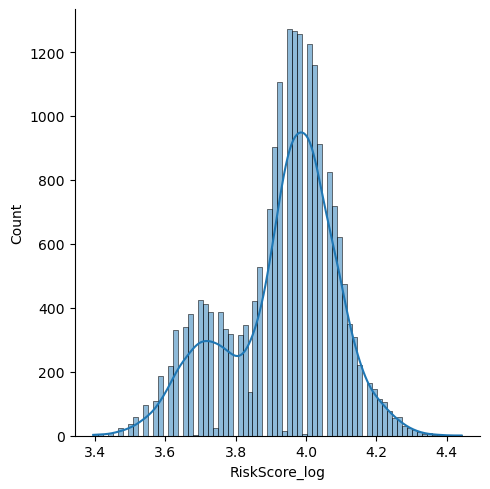

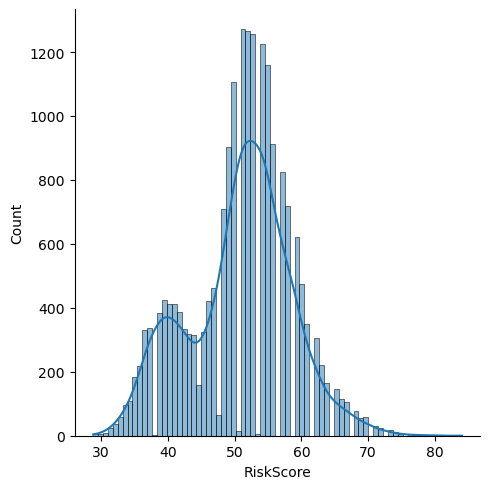

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(num_cols_df["RiskScore_log"], kde=True)
plt.show()
print('\n')
sns.displot(num_cols_df["RiskScore"], kde=True)
plt.show()

In [17]:
from scipy.stats import pointbiserialr

![Sample Image](Screenshot%202024-09-30%20194521.png)

In [19]:
in_num_cols_df = num_cols_df.drop(["LoanApproved"], axis=1)
out_num_cols_df = num_cols_df["LoanApproved"]

# log transform of loan amount
in_num_cols_df["LoanAmount_log"] = np.log(in_num_cols_df["LoanAmount"] + 1)
in_num_cols_df["LoanDuration_log"] = np.log(in_num_cols_df["LoanDuration"] + 1)

# point bi-serial correlation
for i in in_num_cols_df.columns:
    correlation_, _ = pointbiserialr(in_num_cols_df[i], out_num_cols_df)
    print(f"Point bi-ser corr ({i} and LoanApproved): {correlation_}")

Point bi-ser corr (Age and LoanApproved): 0.14102854508347537
Point bi-ser corr (AnnualIncome and LoanApproved): 0.5979001985185207
Point bi-ser corr (CreditScore and LoanApproved): 0.1420003687024599
Point bi-ser corr (EmploymentStatus and LoanApproved): -0.02041132770407067
Point bi-ser corr (Experience and LoanApproved): 0.14075515432839555
Point bi-ser corr (LoanAmount and LoanApproved): -0.23949552245258915
Point bi-ser corr (LoanDuration and LoanApproved): -0.09455826074209174
Point bi-ser corr (NumberOfDependents and LoanApproved): 0.0017173109242089276
Point bi-ser corr (MonthlyDebtPayments and LoanApproved): -0.07041474221981399
Point bi-ser corr (CreditCardUtilizationRate and LoanApproved): -0.010465978638291998
Point bi-ser corr (NumberOfOpenCreditLines and LoanApproved): -0.00476852666752305
Point bi-ser corr (NumberOfCreditInquiries and LoanApproved): -0.00588496493455312
Point bi-ser corr (DebtToIncomeRatio and LoanApproved): 3.426231738457193e-05
Point bi-ser corr (Bankr

In [20]:
print(in_num_cols_df["EmploymentStatus"].unique())
print()
print(out_num_cols_df.unique())

[0 1 2]

[0 1]
